<a href="https://colab.research.google.com/github/deeptive/Machine-learning/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies needed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Collecting data from [Kaggle](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbFdHUXlkcFFhX3VlNW4zRDlab1UyZ3ItRFhzQXxBQ3Jtc0trQnRpckZyUU5iOEtuTG5Fc3d3OWU3LTFhbmVwbmJPd3U5ZGItazFJZGpTUHRaT0xhMGxiS2lPQkxxVld5NnlpZ092N0xqd0RLZXNzcHFOQmNDamNSNFc4OG82U0xnVmhXZ0hwV2dZWGFmQ1c3MGNNRQ&q=https%3A%2F%2Fwww.kaggle.com%2Fvjchoudhary7%2Fcustomer-segmentation-tutorial-in-python&v=SrY0sTJchHE) and analysing it

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting more information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for any missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the Annual Income Column, Age and Spending Score column as the features

In [ ]:
X = customer_data.iloc[:,[2,3,4]].values

In [ ]:
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

Choosing the number of clusters

Using the elbow method and manual interpretation for determining the number of clusters

In [ ]:
# finding cost value for different number of clusters

cost = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  cost.append(kmeans.inertia_)

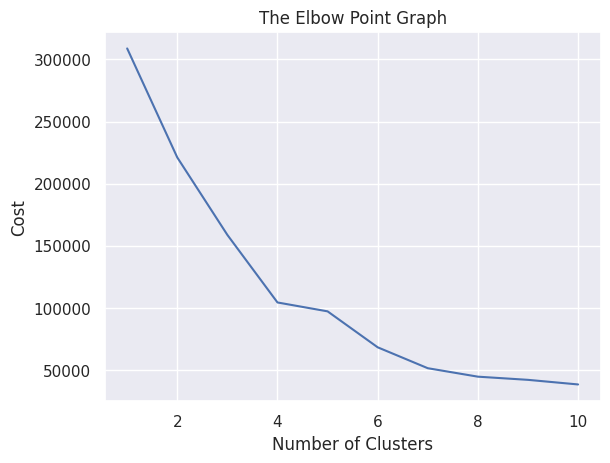

In [ ]:
# plot the elbow graph

sns.set()
plt.plot(range(1,11), cost)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

Optimum Number of Clusters from the elbow graph could be 4, 5 or 6

Training the k-Means Clustering Model for 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 4 0 4 4 0 0 0 0
 0 4 4 4 4 0 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 0 0
 4 4 4 4 4 0 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters by plotting the graph

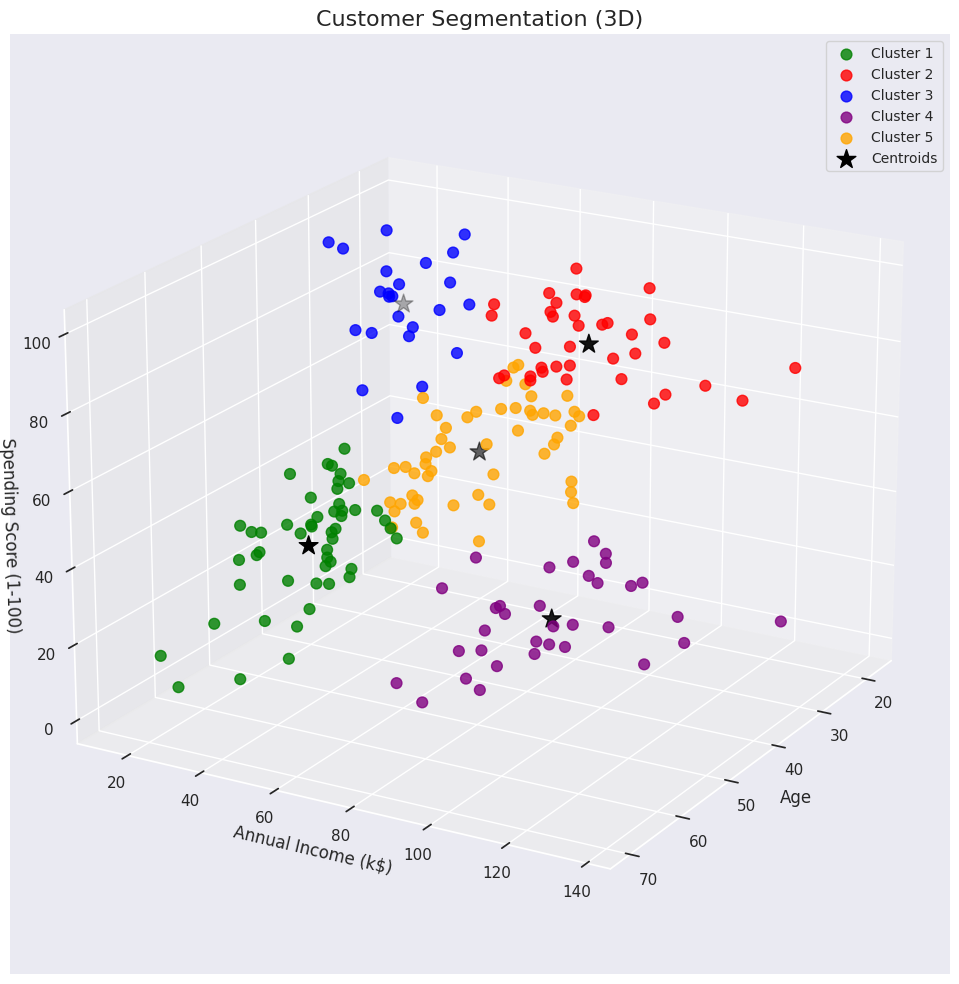

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['green', 'red', 'blue', 'purple', 'orange']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Plot clusters
for i in range(5):
    ax.scatter(
        X[Y == i, 0],  # Age
        X[Y == i, 1],  # Annual Income
        X[Y == i, 2],  # Spending Score
        s=60,
        c=colors[i],
        label=labels[i],
        alpha=0.8,
        depthshade=True
    )

# Plot centroids
ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    kmeans.cluster_centers_[:, 2],
    s=200,
    marker='*',
    c='black',
    label='Centroids'
)

# Axis labels and title
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Annual Income (k$)', fontsize=12)
ax.set_zlabel('Spending Score (1-100)', fontsize=12)
ax.set_title('Customer Segmentation (3D)', fontsize=16)
ax.legend(fontsize=10)

# Add grid and adjust view
ax.grid(True)
ax.view_init(elev=20, azim=30)  # Adjust viewing angle

plt.tight_layout()
plt.show()